In [647]:
import pyautogui as ag
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import colorsys
import random
import time

plt.ion()
plt.show()

In [1023]:
ag.PAUSE = 0.1
ag.FAILSAFE = True

In [303]:
width, height = pyautogui.size()

print(width,height)

1920 1080


In [116]:
ag.moveTo(300, 100, duration=0.25)

In [7]:
# for i in range(5):
#       pyautogui.moveTo(100, 100, duration=0.25)
#       pyautogui.moveTo(200, 100, duration=0.25)
#       pyautogui.moveTo(200, 200, duration=0.25)
#       pyautogui.moveTo(100, 200, duration=0.25)

In [898]:
curMousePos = ag.position()
print(curMousePos)

(1066, 635)


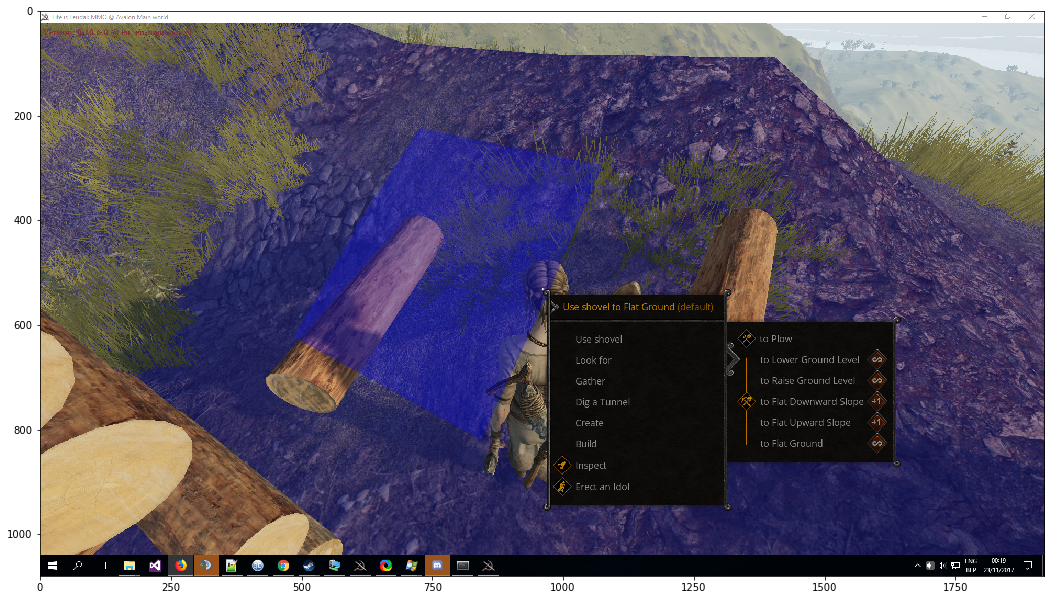

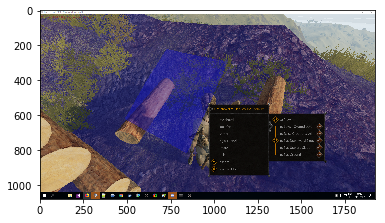

In [900]:
im = ag.screenshot()

plt.figure(figsize=(18,18))
plt.imshow(im)
plt.show()

npim = np.asarray(im)

plt.imshow(npim)

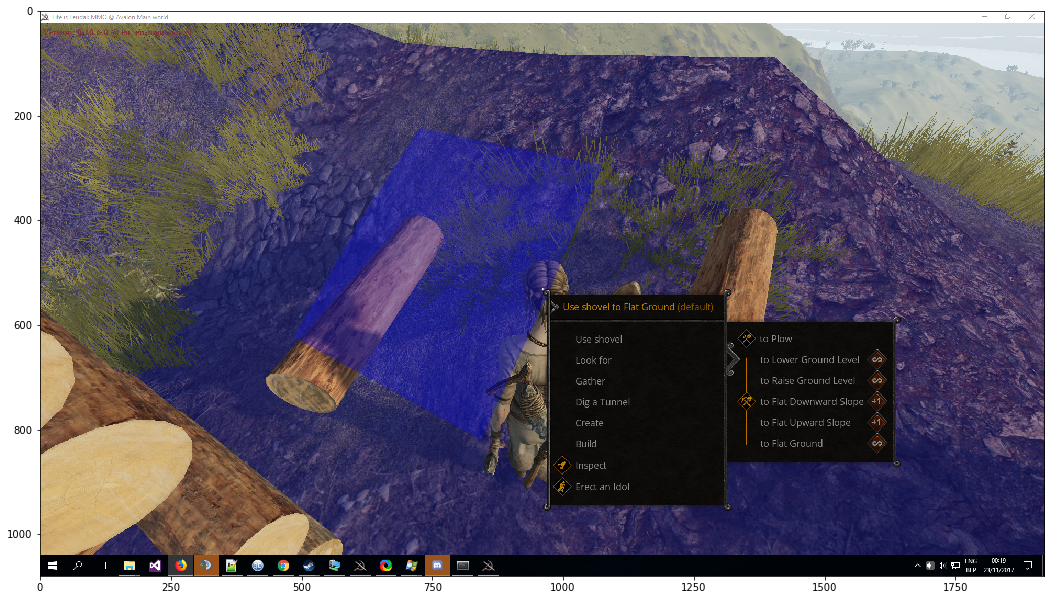

In [905]:
# print(npim.shape)
# print(npim[5:6,20:21,:].shape)
# print(npim[5:6,20:21,:])
# print(type(npim[0,0,0]))
# np.short(npim)
plt.figure(figsize=(18,18))
plt.imshow(npim)

In [718]:
curMousePos = ag.position()
print(curMousePos)

(959, 529)


In [901]:
curMousePos = (curMousePos[0],curMousePos[1])

In [902]:
p = (curMousePos[0],curMousePos[1])

In [924]:
p = (p[0]+10,p[1])

(1066, 635) 10


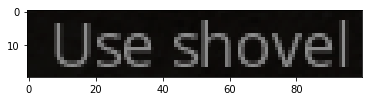

In [927]:
r = 10

print(curMousePos, r)

# subimage = subImage(npim, p,r)
subimage = subImageRect(npim, (p[0], p[1],100,20))
    
# plt.imshow(npim[5,20,:])
plt.imshow(subimage)

In [956]:
curMousePos = ag.position()
print(curMousePos)
p = (curMousePos[0],curMousePos[1])


(1370, 601)


In [ ]:
im = ag.screenshot()
npim = np.asarray(im)

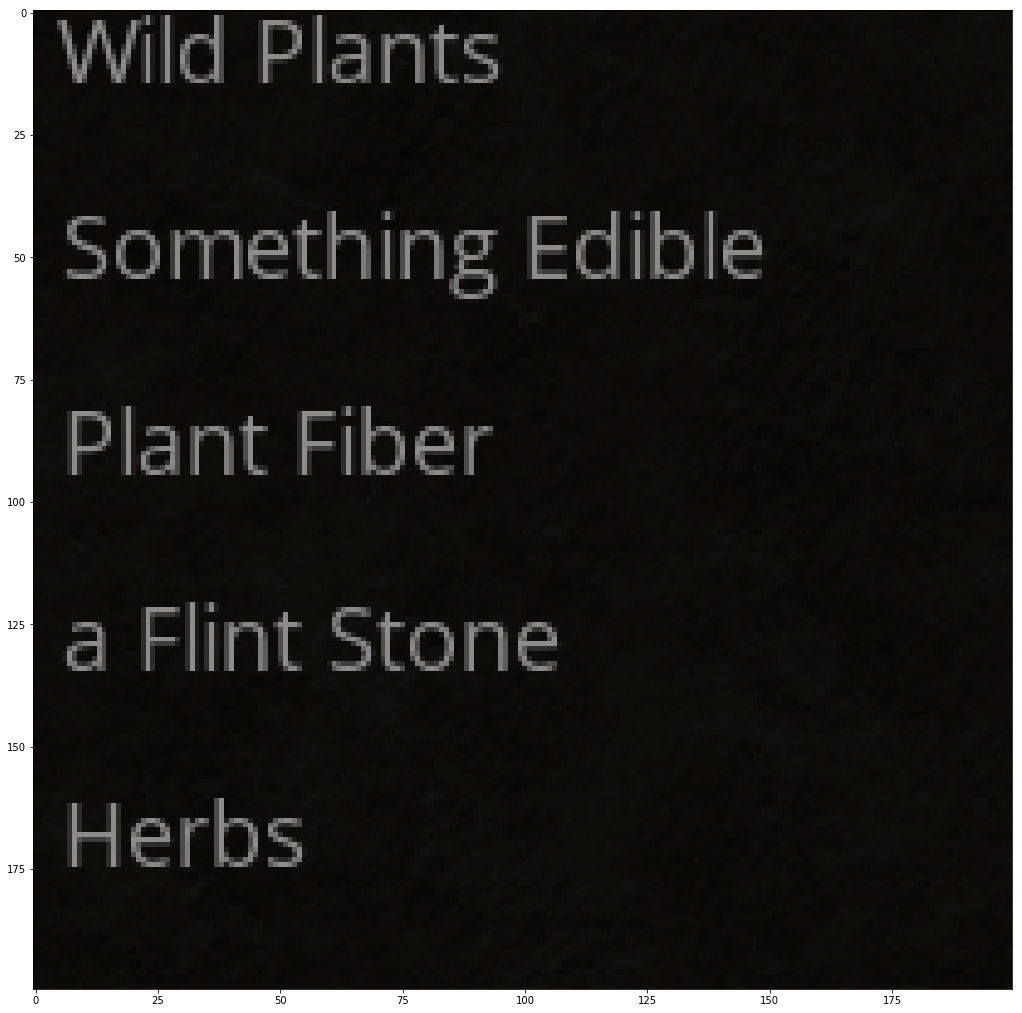

In [987]:
p = (p[0],p[1]+20)
plt.figure(figsize=(18,18))
subimage = subImageRect(npim, (p[0], p[1],200,200))
plt.imshow(subimage)

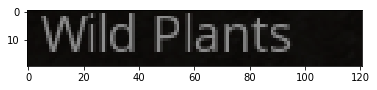

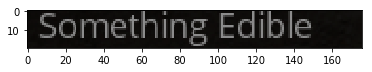

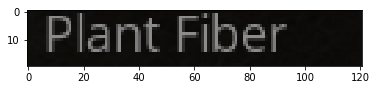

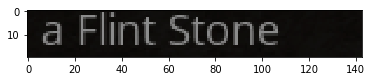

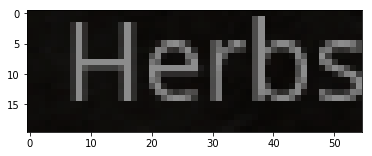

In [988]:
im = ag.screenshot()
npim = np.asarray(im)

menuItems = ['Wild Plants', 'Something Edible','Plant Fiber', 'a Flint Stone', 'Herbs']
c = 0
for m in menuItems:
    if m == '' or m == 0 or m is None:
        c = c+1
        continue
    plt.figure()
    subimage = subImageRect(npim, (p[0], p[1]+40*c,11*len(m),20))
    plt.imshow(subimage)
    scipy.misc.imsave( m + '.png', subimage)
    c = c+1


In [ ]:
scipy.misc.imsave('apple.png', subimage)

In [897]:
scipy.misc.imsave('apple.png', subimage)

In [133]:
ag.locate('foodbar.png', im)

(62, 974, 20, 20)

In [1129]:
def getHSV(t):
    return colorsys.rgb_to_hsv(t[0]/255,t[1]/255,t[2]/255)

def subImage(image, point,radius=10):
    subimage = image[
        point[1]-radius:point[1]+radius,
        point[0]-radius:point[0]+radius]
    return subimage

def subImageRect(image, rect):
    subimage = image[
        rect[1]:rect[1]+rect[3],
        rect[0]:rect[0]+rect[2]]
    return subimage

def doubleClickInRect(rect):
#     print(rect)
    p = (rect[0] + rect[2]//2,
         rect[1] + rect[3]//2)
#     print(pyautogui.onScreen(p[0], p[1]))
    
    ag.moveTo(p[0], p[1], 0.2)
    ag.click(clicks=2)
#     print(p)


def navigateMenuName(menuName, submenuName ='', im=None):
    w,h = pyautogui.size()
    ag.moveTo(w//2, h//2)
    ag.click()
    pyautogui.press('tab') 
    
    ag.rightClick()
    
    if im is None:
        im = ag.screenshot()
        
    mPos = ag.locate(menuName+'.png', im)
    if mPos is None:
        print("Can't find ", menuName)
        return False
    ag.moveTo(mPos[0],mPos[1], 0.5)
    
    if (subMenuName == ''):
        ag.click()
        return True
    
    im = ag.screenshot()

    mPos = ag.locate(submenuName+'.png', im)
    if mPos is None:
        print("Can't find ", subMenuName)
        return False
    
    ag.moveTo(mPos[0],mPos[1], 0.5)
    # click
    return True

def navigateMenuPosition(menuPos, subMenuPos=0, im=None):
    w,h = pyautogui.size()
    ag.moveTo(w//2, h//2)
    ag.click()
    pyautogui.press('tab') 
    
    ag.rightClick()
    ag.moveRel(-50,-50)
    if im is None:
        im = ag.screenshot()
    
    plt.imshow(np.asarray(im))
    
    # find menu
    mPos = ag.locate('topLeftMenuIcon.png', im)
    print(mPos)
    if mPos is None:
        return False
    
    ag.moveTo(mPos[0]+mPos[2],mPos[1]+mPos[3],0.25)
    ag.moveRel(0,40*menuPos)
    
    if subMenuPos == 0:
        ag.click()
        return True
    else:
        ag.moveRel(400,0,1)
        ag.moveRel(0,40*(subMenuPos-1),1)
        ag.click()
        return True


In [1145]:
LIFE_BAR=1
HEALTH_BAR=LIFE_BAR
HUNGER_BAR=2
STAMINA_BAR=3
STAM_BAR = STAMINA_BAR
FOOD_BAR = HUNGER_BAR
PROGRESS_BAR = 4
MAX_BAR = 4

barnames= {}
barnames[LIFE_BAR] = 'life'
barnames[STAM_BAR] = 'stamina'
barnames[FOOD_BAR] = 'food'
barnames[PROGRESS_BAR] = 'progress'

class lifCharacter():
    
    
    windowwidth = 0
    windowheight = 0
    centerheight = 0
    bars = {}
    
    hues = {LIFE_BAR : [0.993, 0.994],
            STAMINA_BAR : [0.148, 0.152],
            HUNGER_BAR : [0.437, 0.437],
            PROGRESS_BAR: [0.08,0.08]
           }
    
    maxBarLength = 400
    hueThreshold = 0.05
    
    def calibrate(self):
        
        self.windowwidth, self.windowheight = pyautogui.size()
        self.findCenter()
        self.bars[PROGRESS_BAR] = (self.windowwidth//2, self.centerheight,0,0)
        
        
        im = ag.screenshot()
        npim = np.asarray(im)
        self.bars[LIFE_BAR] = ag.locate('lifebar.png', im)
        self.bars[HUNGER_BAR] = ag.locate('hungerbar.png', im)
        self.bars[STAMINA_BAR] = ag.locate('staminabar.png', im)
        
        barhoffset = 17
        barvoffset = 9
        self.bars[LIFE_BAR] = (self.bars[LIFE_BAR][0]+barhoffset,self.bars[LIFE_BAR][1]+barvoffset,self.bars[LIFE_BAR][2],self.bars[LIFE_BAR][3])
        self.bars[HUNGER_BAR] = (self.bars[HUNGER_BAR][0]+barhoffset,self.bars[HUNGER_BAR][1]+barvoffset,self.bars[HUNGER_BAR][2],self.bars[HUNGER_BAR][3])
        self.bars[STAMINA_BAR] = (self.bars[STAMINA_BAR][0]+barhoffset,self.bars[STAMINA_BAR][1]+barvoffset,self.bars[STAMINA_BAR][2],self.bars[STAMINA_BAR][3])
        
        # set the bar widths
        m = 0
        for bar in [LIFE_BAR, HUNGER_BAR, STAM_BAR]:
            b, _ = self.getBarLength(bar)
            if b > m:
                m = b
        for bar in [LIFE_BAR, HUNGER_BAR, STAM_BAR]:
            self.bars[bar] = (self.bars[bar][0],self.bars[bar][1],m,2)
    
        self.calibrateProgressBar()
        print('calibration complete')
#         self.debugCalibration()
    
    
    def debugCalibration(self):
        im = self.getScreenshot()

        for bar in self.bars:
            print(barnames[bar])
            plt.figure(figsize=(18,12))
            plt.imshow(subImageRect(im, self.bars[bar]), interpolation='none')

        
    def findCenter(self):
        npim = self.getScreenshot()
        num = 0
        for h in range(self.windowheight//2-20,self.windowheight//2+40):
            hsv = getHSV(npim[h,self.windowwidth//2])
            if hsv == (0,0,1):
                num = num + 1
                if num == 3:
                    # found 3 white pixels
                    self.centerheight = h-1
                    break
            else:
                num = 0
                
        if num == 0:
            self.centerheight = 531
            print("couldn't find center in image")
        else:
            print("found center at ({},{})".format(self.centerheight, self.windowwidth//2))
        return self.centerheight, self.windowwidth//2+1
    
    def calibrateProgressBar(self):
        npim = self.getScreenshot()
        h = self.centerheight
        w = self.windowwidth//2

        end = 0
        start = 0
        refhue = self.hues[PROGRESS_BAR][0]
        hue= getHSV(npim[h,w])[0]
#         print(w, h)
        for i in range(w, w-self.maxBarLength,-1):
            hue = getHSV(npim[h,i])
            if hue[0] > refhue - hueThreshold and hue[0] < refhue + hueThreshold and hue[1] > 0.5:
                end = i
                if start == 0:
                    start = i
#                 print("ok:", i, hue, start, end, w)
            elif start != 0:
#                 print("done:", i, hue, start, end, w)
                break
            else:
                None
#                 print("xx:", i, hue, start, end, w)
                
        if ( abs(end-w) > 50 and end!=0 ):
            self.bars[PROGRESS_BAR] = (w-(abs(end-w)), h, 2*(abs(end-w)),10)
            print("progress bar:", self.bars[PROGRESS_BAR])
        else:
            self.bars[PROGRESS_BAR] = (self.windowwidth//2 - 462//2, self.centerheight, 462, 10)
            print('no bar')
            
    def getScreenshot(self):
        im = ag.screenshot()
        npim = np.asarray(im)
        return npim
    
    def getBarLength(self, bar, softorhard=0, npim = None):
        # TODO: check by chunks (+20, +10, +5, etc.)
        
        if npim is None:
            npim = self.getScreenshot()
        
        h = self.bars[bar][1]
        w = self.bars[bar][0]

        end=0
        start = 0
        
        ma  = self.bars[bar][2]+1
        if ( ma < 100):
            ma = self.maxBarLength
            
        for i in range(ma):
            hue = getHSV(npim[h+2*softorhard,w+i])
            if bar == PROGRESS_BAR:
                extra = (hue[1] > 0.6 and hue[2] > 0.5)
            else:
                extra = True
                
            if hue[0] > self.hues[bar][softorhard] - hueThreshold and hue[0] < self.hues[bar][softorhard] + hueThreshold and extra:
                end = i
                if start == 0:
                    start = i
            elif start != 0:
                break
                
        return end-start, (start, end)
        
    def getStatus(self):
        im = self.getScreenshot()
        status = {}
        status['bars'] = {}
        for bar in range(1,MAX_BAR+1):
            for softorhard in range(2):
                if bar == PROGRESS_BAR or bar == FOOD_BAR:
                    barname = barnames[bar]
                elif softorhard == 0:
                    barname = 'soft ' + barnames[bar]
                else:
                    barname = 'hard ' + barnames[bar]
                status['bars'][barname],_ = self.getBarLength(bar, softorhard,im)
                if self.bars[bar][2] != 0:
                    status['bars'][barname] /= self.bars[bar][2]-1
                else:
                    status['bars'][barname] = 0
        if status['bars']['progress'] == 0:
            status['inAction'] = 0
        else:
            status['inAction'] = 1

        return status
    
    def isInventoryOpen(self, npim=None):
        invposition = ag.locate('inventory.png')
        if invposition is None:
            return False
        else:
            return invposition
        
    def findFoodInInventory(self):
        foodItemList = ['taproot','berry', 'nuts', 'apple']

        im = ag.screenshot()
        foodPositions = []
        for foodItem in foodItemList:
            foodPositions = foodPositions + list(ag.locateAll(foodItem + '.png', im))
            
        return foodPositions
        
    
    def feed(self, threshold=0.9):
        self.interruptActionIfActive()
        
        print('starting feeding loop (max 10)')
        for _ in range(10):
            if ag.onScreen(ag.position()) == False:
                break

            foodPositions = self.findFoodInInventory()
            if len(foodPositions) == 0:
                print("Didn't find food, getting food")
                self.gatherFood()
            else:
                print("found stacks of food:", len(foodPositions))
            

            print('checking food status...', end='', flush=True)
            if self.getStatus()['bars']['food'] > threshold:
                print('finished eating')
                return True
            num = random.randint(0,len(foodPositions))
            print('eating once', num)
            doubleClickInRect(foodPositions[num])

            # waiting for end of food
            time.sleep(2)
            for _ in range(60):
                time.sleep(0.5)
                print('.', end='', flush=True)
                if self.getStatus()['inAction'] == False:
                    print('finished task')
                    break
        return False # didn't finish
    
    def gatherFood(self):
        self.interruptActionIfActive() 
        foods = []
        count = 0
        while len(foods) == 0 and count < 10:
            navigateMenuPosition(3,1) # TODO (this assumes it's the 3rd thing, without "plant", it's second. Need OCR)
            time.sleep(30)
            foods = self.findFoodInInventory()
            count = count+1

    def interruptActionIfActive(self):
        st = self.getStatus()
        
        if st['inAction'] == True:
            self.interruptAction()
    
    def interruptAction(self):
        print('stopping...', end='.', flush=True)
        w,h = pyautogui.size()
        ag.moveTo(w//2, h//2, 0.2)
        ag.click()
        time.sleep(1)
        pyautogui.press('esc') 
        time.sleep(1)
        print('stopped')
    
lif = lifCharacter()

lif.calibrate()
print(lif.bars)
print(lif.getStatus())
self=lif

found center at (531,960)
no bar
calibration complete
{4: (729, 531, 462, 10), 1: (79, 826, 229, 2), 2: (79, 983, 229, 2), 3: (79, 903, 229, 2)}
{'bars': {'soft life': 1.0, 'hard life': 0.9956140350877193, 'food': 0.6754385964912281, 'soft stamina': 1.0, 'hard stamina': 0.9780701754385965, 'progress': 0.0}, 'inAction': 0}


960 531
progress bar: (729, 531, 462, 10)
{'bars': {'soft life': 1.0, 'hard life': 0.9956140350877193, 'food': 0.40789473684210525, 'soft stamina': 1.0, 'hard stamina': 0.9912280701754386, 'progress': 0.0824295010845987}, 'inAction': 1}
progress
life
food
stamina


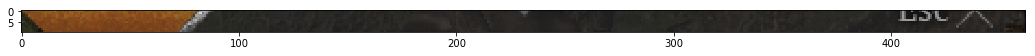

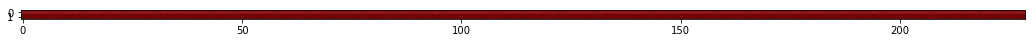

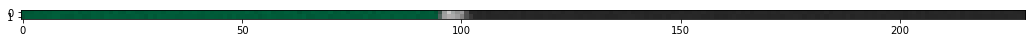

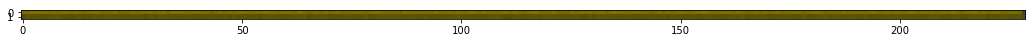

In [1082]:
lif.calibrateProgressBar()
print(lif.getStatus())
lif.debugCalibration()

{'bars': {'soft life': 1.0, 'hard life': 0.9956140350877193, 'food': 0.7456140350877193, 'soft stamina': 1.0, 'hard stamina': 0.9912280701754386, 'progress': 0.0824295010845987}, 'inAction': 1}
progress
life
food
stamina


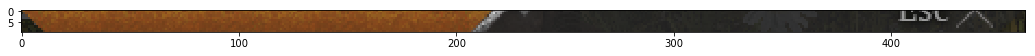

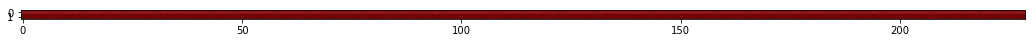

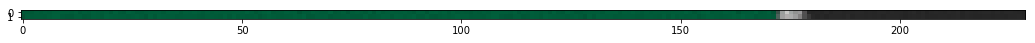

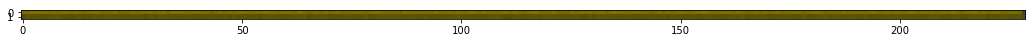

In [707]:
print(lif.getStatus())
lif.debugCalibration()


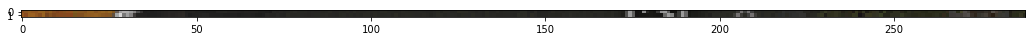

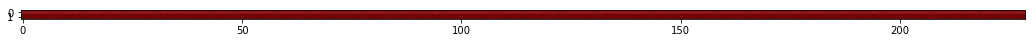

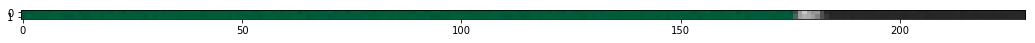

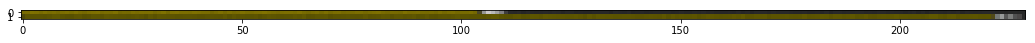

In [530]:

im = self.getScreenshot()

for bar in self.bars:
    plt.figure(figsize=(18,12))
    plt.imshow(subImageRect(im, self.bars[bar]))




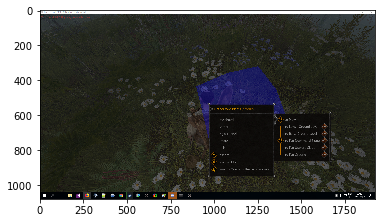

In [710]:
im = ag.screenshot()
npim = np.asarray(im)
plt.imshow(npim)

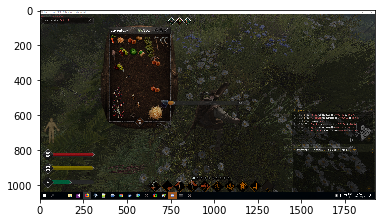

In [621]:
plt.imshow(npim)

In [715]:
lif.feed()

found stacks of food: 17
starting feeding loop (max 10)
checking food status...eating once
(214, 552, 8, 8)
True
(218, 556)
...finished task
checking food status...eating once
(238, 426, 8, 8)
True
(242, 430)
...finished task
checking food status...eating once
(211, 580, 8, 8)
True
(215, 584)
...finished task
checking food status...eating once
(258, 564, 8, 8)
True
(262, 568)
...finished task
checking food status...eating once
(212, 470, 8, 8)
True
(216, 474)
...finished task
checking food status...eating once
(214, 501, 8, 8)
True
(218, 505)
...finished task
checking food status...eating once
(258, 564, 8, 8)
True
(262, 568)
...finished task
checking food status...finished eating


True

In [990]:
lif.getStatus()

{'bars': {'food': 0.6535087719298246,
  'hard life': 0.9956140350877193,
  'hard stamina': 0.9912280701754386,
  'progress': 0.0824295010845987,
  'soft life': 1.0,
  'soft stamina': 1.0},
 'inAction': 1}

In [699]:
ag.onScreen(ag.position())

False

[75 68 50] (0.12, 0.33333333333333337, 0.29411764705882354)
0.0 0.5 0.384048885748


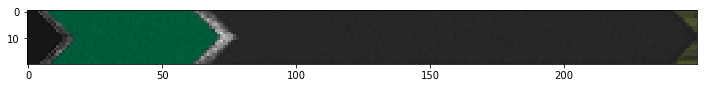

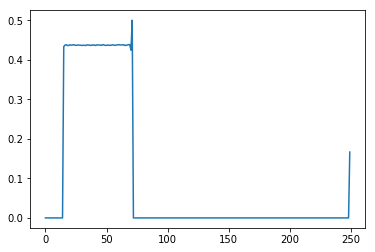

In [275]:
h = lif.bars[HUNGER_BAR][1]-10
w = lif.bars[HUNGER_BAR][0]-10

a = np.zeros(250)

print(npim[h,10], getHSV(npim[h,10]))
for i in range(250):
    a[i] = getHSV(npim[h+8,w+i])[0]
#     print(npim[h+8,w+i], getHSV(npim[h+8,w+i]))


plt.figure(figsize=(12,12))
plt.imshow(npim[h:h+20,w:w+250])
plt.figure()
plt.plot(a)
print(a[15:80].min(),a[15:80].max(),a[15:80].mean())

(0.069182389937106917, 0.77372262773722622, 0.53725490196078429)
range: 960 671


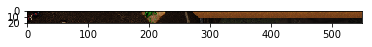

In [372]:
# bar = STAM_BAR

# for bar in [STAM_BAR, LIFE_BAR, HUNGER_BAR]:
# h = lif.bars[bar][1]-10
# w = lif.bars[bar][0]-10

# npim = lif.getScreenshot()

h = lif.bars[PROGRESS_BAR][1]
w = lif.bars[PROGRESS_BAR][0]

maxBarLength = 300
hueThreshold = 0.05
start = 0

print(getHSV(npim[h,w]))

refhue = lif.hues[PROGRESS_BAR][0]
refhue = 0.08
hue= getHSV(npim[h,w])[0]
if hue > refhue - hueThreshold and hue < refhue + hueThreshold:
    for i in range(w, w-maxBarLength,-1):
        hue = getHSV(npim[h,i])[0]
        if hue > refhue - hueThreshold and hue < refhue + hueThreshold:
            end = i
            if start == 0:
                start = i
        elif start != 0:
#             print(hue, refhue)
            break
    print("range:",start,end)
else:
    print('no bar')
plt.imshow(npim[h:h+20,w-500:w+50])

In [ ]:
185

520 (0.11111111111111112, 0.33333333333333331, 0.035294117647058823)
521 (0.083333333333333329, 0.40000000000000002, 0.039215686274509803)
522 (0.055555555555555559, 0.29999999999999999, 0.039215686274509803)
523 (0.083333333333333329, 0.36363636363636365, 0.043137254901960784)
524 (0.11111111111111112, 0.29999999999999999, 0.039215686274509803)
525 (0.047619047619047616, 0.31818181818181818, 0.086274509803921567)
526 (0.041666666666666664, 0.32000000000000001, 0.098039215686274508)
527 (0.020833333333333332, 0.30769230769230771, 0.10196078431372549)
528 (0.04166666666666663, 0.12121212121212131, 0.12941176470588237)
529 (0.83333333333333337, 0.0084745762711865309, 0.46274509803921571)
530 (0.0, 0.0, 1.0)
531 (0.0, 0.0, 1.0)
532 (0.0, 0.0, 1.0)
533 (0.83333333333333337, 0.0083333333333333037, 0.47058823529411764)
534 (0.0, 0.1081081081081081, 0.14509803921568629)
535 (0.037037037037037035, 0.29032258064516131, 0.12156862745098039)
536 (0.020833333333333332, 0.25806451612903225, 0.12156

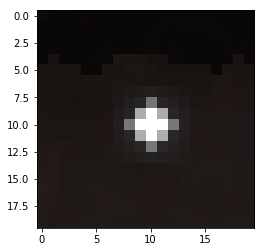

In [325]:

for h in range(height//2-20,height//2+30):
    print(h, getHSV(npim[h,width//2]))


plt.imshow(subImage(npim, (width//2, 531), 10))
# plt.imshow(npim[width//2-50, width//2+50, 460:500])

In [314]:
p[0]+224

962

In [306]:
width//2, height

(960, 1080)

In [277]:
lif.hues[bar][0]

0.437

In [278]:
lif.getBarLength(STAM_BAR)

(226, (15, 241))

In [300]:
getHSV(npim[h,w+90])

(0.091304347826086943, 0.76666666666666661, 0.58823529411764708)

In [335]:
npim = lif.getScreenshot()

plt.imshow(npim[lif.bars[PROGRESS_BAR][0],lif.bars[PROGRESS_BAR][1]])

KeyError: 4

In [347]:
lif.bars[2]

(72, 984, 10, 20)

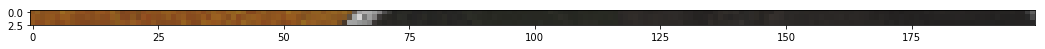

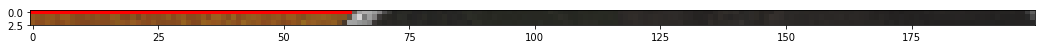

In [446]:
plt.figure(figsize=(18,12))
plt.imshow(npim[h:h+3,w-200:w])

npim2 = npim.copy()

for i in range(w, w-self.maxBarLength,-1):
    hue = getHSV(npim2[h,i])
    if hue[0] > refhue - hueThreshold and hue[0] < refhue + hueThreshold and hue[1] > 0.5:
        npim2[h,i] = [255,0,0]
        
plt.figure(figsize=(18,12))
plt.imshow(npim2[h:h+3,w-200:w])


In [1102]:
# self = lif

# # npim = self.getScreenshot()
# h = self.bars[PROGRESS_BAR][1]
# w = self.bars[PROGRESS_BAR][0]

# start = 0
# refhue = self.hues[PROGRESS_BAR][0]
# hue= getHSV(npim[h,w])[0]
# for i in range(w, w-self.maxBarLength,-1):
#     hue = getHSV(npim[h,i])
#     print(hue)
#     if hue[0] > refhue - hueThreshold and hue[0] < refhue + hueThreshold and hue[1] > 0.5:
#         print('x', end='')
#         end = i
#         if start == 0:
#             print('start')
#             start = i
#     elif start != 0:
#         print('breaking')
# #         break
# #     print(hue)

# if ( abs(end-w) > 30):
#     self.bars[PROGRESS_BAR] = (self.bars[PROGRESS_BAR][0],self.bars[PROGRESS_BAR][1],2*(abs(end-w)),2)
# else:
#     print('no bar')
    
# print(self.bars[PROGRESS_BAR])


In [1043]:
mPos = ag.locate('topleftmenuicon.png', im)
print(mPos)

(970, 542, 30, 50)


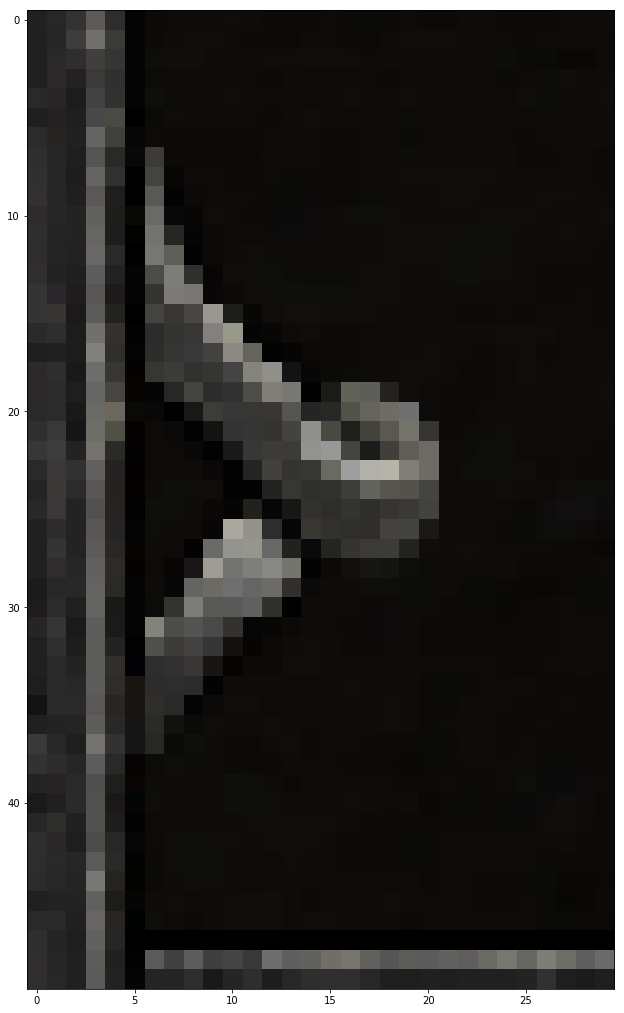

In [1047]:
plt.figure(figsize=(18,18))
plt.imshow(npim[mPos[1]:mPos[1]+mPos[3],
                mPos[0]:mPos[0]+mPos[2]])

getHSV()


In [1146]:
lif = lifCharacter()
lif.calibrate()

found center at (531,960)
no bar
calibration complete


+not currently working, set work: {'bars': {'soft life': 1.0, 'hard life': 0.9956140350877193, 'food': 0.7017543859649122, 'soft stamina': 1.0, 'hard stamina': 0.9912280701754386, 'progress': 0.0}, 'inAction': 0}
(970, 542, 30, 50)
.need food {'bars': {'soft life': 1.0, 'hard life': 0.9956140350877193, 'food': 0.6929824561403509, 'soft stamina': 1.0, 'hard stamina': 0.9912280701754386, 'progress': 0.0824295010845987}, 'inAction': 1}
stopping....stopped
starting feeding loop (max 10)
found stacks of food: 1
checking food status...eating once 0
....finished task
Didn't find food, getting food
(970, 542, 30, 50)
checking food status...eating once 0


IndexError: list index out of range

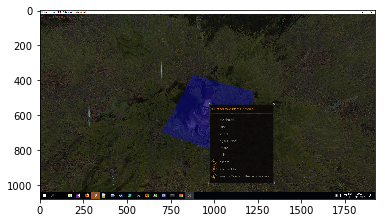

In [1147]:
while True:
    st = lif.getStatus()
    
    if st['bars']['food'] < 0.7:
        print('need food', st)
        lif.feed(0.9)
        
    elif st['inAction'] == 0:
        print('+', end='', flush=True)
        time.sleep(2) # waiting a bit to see if progress bar pops up
        st = lif.getStatus()
        if st['inAction'] == 0:
            print('not currently working, set work:', st)
            navigateMenuPosition(3,7)
            if ag.onScreen(ag.position()) == False: # user moved the mouse outside the screen, interrupt
                break
            
    else:
        print('.', end='', flush=True)
    time.sleep(1)

In [1123]:
lif.feed()

found stacks of food: 1
starting feeding loop (max 10)
checking food status...eating once 0
....finished task
checking food status...eating once 0
....finished task
checking food status...finished eating


True